In [1]:
import matplotlib.pyplot as plt

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# Feature 확인

In [3]:
image_name='0a1d6c66-b214a6e8-09501125-827f5b5a-3fa1bcc5.jpg'
image_dir='/home/mskang/jinsu/med/H_LSTM_Transformer/data/all_jpgs'
jpg_path = os.path.join(image_dir, image_name)


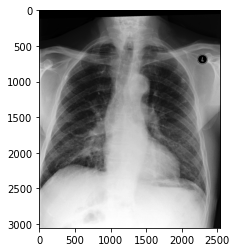

In [4]:
plt.imshow(plt.imread(jpg_path), cmap='gray')

In [5]:
feature_dir='/home/mskang/jinsu/med/XTransformer/mimic/feature/CNN_feature/1029_features_mditransformer_ewp/'
image_npz_path=os.path.join(feature_dir, image_name+'.npz')

In [6]:
import numpy as np
image_npz=np.load(image_npz_path)


In [7]:
image_feature=image_npz['feat']
print(image_feature.shape)
print(7*7 + 14*14 + 28*28) # 1029.
print(image_feature[:10, 0])

(1029, 512)
1029
[ 0.04291815  0.24120937  0.29945877  0.10340297 -0.127762    0.0180492
 -0.16509648  1.01495874  3.58458686  2.22430396]


# Feature Extractor

In [8]:
from feature_extractor import FeatureExtractor

In [9]:

from glob import glob
import argparse

In [10]:
module_path = '/home/mskang/jinsu/med'
if module_path not in sys.path:
	sys.path.append((module_path))

In [11]:
image_root = '/home/mskang/jinsu/med/H_LSTM_Transformer/data/'
input_dir = os.path.join(image_root, 'all_jpgs')
normal_dir = os.path.join(image_root, 'normal_image')

In [12]:
parser =argparse.ArgumentParser()

parser.add_argument('input_image_dir', default=None, type=str)
parser.add_argument('normal_image_dir', default=None, type=str)
parser.add_argument('model_name', default='resnet152', type=str)
parser.add_argument('pretrained', default='ImageNet', type=str)
parser.add_argument('batch_size', default=1, type=int)


parser.add_argument('resize', default=256, type=int)
parser.add_argument('crop_size', default=224, type=int)
parser.add_argument('feat_fusion_mode', default='ewp', type=str)
parser.add_argument('diff_mode', default='only_one_normal', type=str)

parser.add_argument('gpu_ids', default='0', type = int) #


args = parser.parse_args(args=[input_dir, normal_dir, 'resnet152', 'ImageNet',
 '32', '256', '224', 'ewp', 'only_one_normal', '0'])

In [13]:
from feature_extractor import FeatureExtractor


feature_extractor=FeatureExtractor(args)

device to use cuda:0


In [23]:
feature_json = feature_extractor.get_features(args.diff_mode)

Compleate : 32/ 1083
Compleate : 64/ 1083
Compleate : 96/ 1083
Compleate : 128/ 1083
Compleate : 160/ 1083
Compleate : 192/ 1083
Compleate : 224/ 1083
Compleate : 256/ 1083
Compleate : 288/ 1083
Compleate : 320/ 1083
Compleate : 352/ 1083
Compleate : 384/ 1083
Compleate : 416/ 1083
Compleate : 448/ 1083
Compleate : 480/ 1083
Compleate : 512/ 1083
Compleate : 544/ 1083
Compleate : 576/ 1083
Compleate : 608/ 1083
Compleate : 640/ 1083
Compleate : 672/ 1083
Compleate : 704/ 1083
Compleate : 736/ 1083
Compleate : 768/ 1083
Compleate : 800/ 1083
Compleate : 832/ 1083
Compleate : 864/ 1083
Compleate : 896/ 1083
Compleate : 928/ 1083
Compleate : 960/ 1083
Compleate : 992/ 1083
Compleate : 1024/ 1083
Compleate : 1056/ 1083
Compleate : 1088/ 1083


## For Normalizaion

### Normalization 확인

In [14]:
 transforms.Normalize((0.485, 0.456, 0.406),
(0.229, 0.224, 0.225))])

SyntaxError: invalid syntax (677344678.py, line 2)

util/mditag_transformer_models_big.py


           

In [ ]:
# mimic_cxr_trainer_mditag_transformer_big.py 
conv5_fc_features, conv4_fc_features, conv3_fc_features = self.extractor.forward(images)      # torch.Size([14*14, B, 512])) / torch.Size([B, 2048])

# normal image feature vector
for j, (norm_images, _, norm_label, norm_captions, norm_prob) in enumerate(self.normal_data_loader):
    # image : torch.Size([1, 3, 224, 224]), label : torch.Size([1, 210]), captions: (1,5,10), prob: (1,5)
    norm_images = self._to_var(norm_images)
    conv5_norm_features, conv4_norm_features, conv3_norm_features = self.extractor.forward(norm_images)  # torch.Size([1, 2048, 7, 7]), torch.Size([2048])

# (patient - normal) image feature vector, mode: subtraction

conv5_diff_features = conv5_fc_features * conv5_norm_features  
conv4_diff_features = conv4_fc_features * conv4_norm_features   
conv3_diff_features = conv3_fc_features * conv3_norm_features 
#conv2_diff_features = conv2_fc_features * conv2_norm_features 

"""norm = sub_avg_features.norm(p=2, dim=1, keepdim=True) # [70, 1]
norm_sub_avg_features = sub_avg_features.div(norm) # [70, 2048]"""

prev_hidden_states = self._to_var(torch.zeros(images.shape[0], 1, self.args.hidden_size))
context = self._to_var(torch.Tensor(captions).long(), requires_grad=False)
prob_real = self._to_var(torch.Tensor(prob).long(), requires_grad=False)



#print("context:", context) # [B, max_word_num+1] with start token
#print("context[:,:-1]:", context[:,:-1]) # [B, max_word_num] 
                
#print("diff_features:", diff_features.shape) # [14*14, B, 512]
#print("diff_features.permute(1,0,2):", diff_features.permute(1,0,2).shape) #[B,14*14,512]
# put context vector into model
#ctx = ctx.unsqueeze(1) # [B, 1, 512]
#total_features = torch.cat([diff_features.permute(1,0,2), ctx], 1) #[B,14*14+1,512]

"""conv5_diff_features = conv5_diff_features.unsqueeze(0)
conv4_diff_features = conv4_diff_features.unsqueeze(0)
conv3_diff_features = conv3_diff_features.unsqueeze(0)
#conv2_diff_features = conv2_diff_features.unsqueeze(0)"""
diff_features = torch.cat([conv5_diff_features, conv4_diff_features, conv3_diff_features], 0)  # [4165,B,512]
total_features = diff_features.permute(1,0,2) #[B,4156,512]

"""del diff_features, conv5_diff_features, conv4_diff_features, conv3_diff_features, conv2_diff_features, conv5_fc_features, conv4_fc_features, conv3_fc_features, conv2_fc_features, conv5_norm_features, conv4_norm_features, conv3_norm_features, conv2_norm_features, images, norm_images, norm_label, norm_captions, norm_prob
torch.cuda.empty_cache()"""

logits = []

logits,(enc_att,self_att) = self.transformer(context[:,:-1], total_features)   # [B, max_word_num, 1808]